In [1]:
# Install statements
# install.packages(c("remotes","pROC","naivebayes"))
# remotes::install_github("jtextor/bayesianNetworks")
# install.packages("bnlearn")
# install.packages("dagitty")
# install.packages("lavaan")

In [2]:
# Packages
library( bayesianNetworks )
library( naivebayes )
library( bnlearn )
library( dagitty )
library( lavaan )

Warning message:
"package 'naivebayes' was built under R version 3.6.3"naivebayes 0.9.7 loaded
Warning message:
"package 'bnlearn' was built under R version 3.6.3"Warning message:
"package 'dagitty' was built under R version 3.6.3"
Attaching package: 'dagitty'

The following objects are masked from 'package:bnlearn':

    ancestors, children, descendants, parents, spouses

Warning message:
"package 'lavaan' was built under R version 3.6.3"This is lavaan 0.6-7
lavaan is BETA software! Please report any bugs.


In [3]:
df <- read.csv('Dataset_Numerical_Classes.csv')

In [4]:
head(df)

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
35-44,0,Professional certificate/ diploma,39,36,42,37,42,0.1883,0.0700,6,0,0
25-34,1,Doctorate degree,29,52,55,48,41,0.1629,0.1183,6,4,3
35-44,1,Professional certificate/ diploma,31,45,40,32,34,0.1464,0.1321,6,3,0
18-24,0,Masters degree,34,34,46,47,46,0.1464,0.0700,5,2,0
35-44,0,Doctorate degree,43,28,43,41,50,0.1883,0.1183,6,3,0
65+,0,Left school at 18,29,38,35,55,52,0.1464,0.0462,6,0,0


In [5]:
df$Caffeine <- ordered(df$Caffeine, levels =c("0","1","2","3","4","5","6"))
df$Cannabis <- ordered(df$Cannabis, levels =c("0","1","2","3","4","5","6"))
df$Meth <- ordered(df$Meth, levels =c("0","1","2","3","4","5","6"))

In [6]:
df$Age <- ordered(df$Age, levels =c("18-24","25-34","35-44","45-54","55-64","65+"))

In [7]:
df$Education <- ordered(df$Education, levels=c("Left school before 16","Left school at 16","Left school at 17","Left school at 18","College or university dropout","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree"))

In [8]:
df

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
35-44,0,Professional certificate/ diploma,39,36,42,37,42,0.1883,0.0700,6,0,0
25-34,1,Doctorate degree,29,52,55,48,41,0.1629,0.1183,6,4,3
35-44,1,Professional certificate/ diploma,31,45,40,32,34,0.1464,0.1321,6,3,0
18-24,0,Masters degree,34,34,46,47,46,0.1464,0.0700,5,2,0
35-44,0,Doctorate degree,43,28,43,41,50,0.1883,0.1183,6,3,0
65+,0,Left school at 18,29,38,35,55,52,0.1464,0.0462,6,0,0
45-54,1,Masters degree,31,32,43,41,48,0.1883,0.1162,6,1,0
35-44,1,Left school at 16,24,52,40,41,52,0.1363,0.1119,6,0,0
35-44,0,Professional certificate/ diploma,42,55,39,48,49,0.1464,0.0462,6,0,0
55-64,1,Masters degree,33,40,36,47,43,0.1464,0.0897,6,1,0


In [9]:
M <- lavCor(df)

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
"lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate"

In [10]:
M

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
Age,1.00000000,-0.12196667,0.17546243,-0.150467605,-0.02788125,-0.23929895,0.07019570,0.211937645,0.1395597469,-0.1581440054,0.142989079,-0.47637466,-0.26129642
Gender,-0.12196667,1.00000000,-0.20129931,-0.070392849,-0.06116698,0.13599424,-0.22038676,-0.183906636,-0.0660827751,0.1652529347,0.010175866,0.30915512,0.24514444
Education,0.17546243,-0.20129931,1.00000000,-0.102837319,0.12035190,0.06496818,0.09246585,0.245952853,0.1348312591,-0.0328075960,0.056165131,-0.26896354,-0.22922808
Nscore,-0.15046761,-0.07039285,-0.10283732,1.000000000,-0.43296725,0.01662559,-0.21514520,-0.398678551,-0.1382315378,-0.0043360538,0.020492632,0.10900993,0.24810640
Escore,-0.02788125,-0.06116698,0.12035190,-0.432967246,1.00000000,0.23606577,0.15906490,0.318780114,-0.0628348289,0.1031308407,0.044232070,-0.02543117,-0.15833390
Oscore,-0.23929895,0.13599424,0.06496818,0.016625590,0.23606577,1.00000000,0.03280548,-0.059995922,-0.1319440731,0.2293739645,-0.002071750,0.42945186,0.24465898
Ascore,0.07019570,-0.22038676,0.09246585,-0.215145199,0.15906490,0.03280548,1.00000000,0.249608607,0.1672650723,-0.0823730754,-0.013683783,-0.16369100,-0.20534460
Cscore,0.21193765,-0.18390664,0.24595285,-0.398678551,0.31878011,-0.05999592,0.24960861,1.000000000,0.2963585991,-0.0871754839,-0.004265342,-0.29270898,-0.25711483
Impulsive,0.13955975,-0.06608278,0.13483126,-0.138231538,-0.06283483,-0.13194407,0.16726507,0.296358599,1.0000000000,0.0001230195,-0.027115369,-0.17786880,-0.15620223
Sensation_seeking,-0.15814401,0.16525293,-0.03280760,-0.004336054,0.10313084,0.22937396,-0.08237308,-0.087175484,0.0001230195,1.0000000000,0.007608059,0.25471207,0.07253836


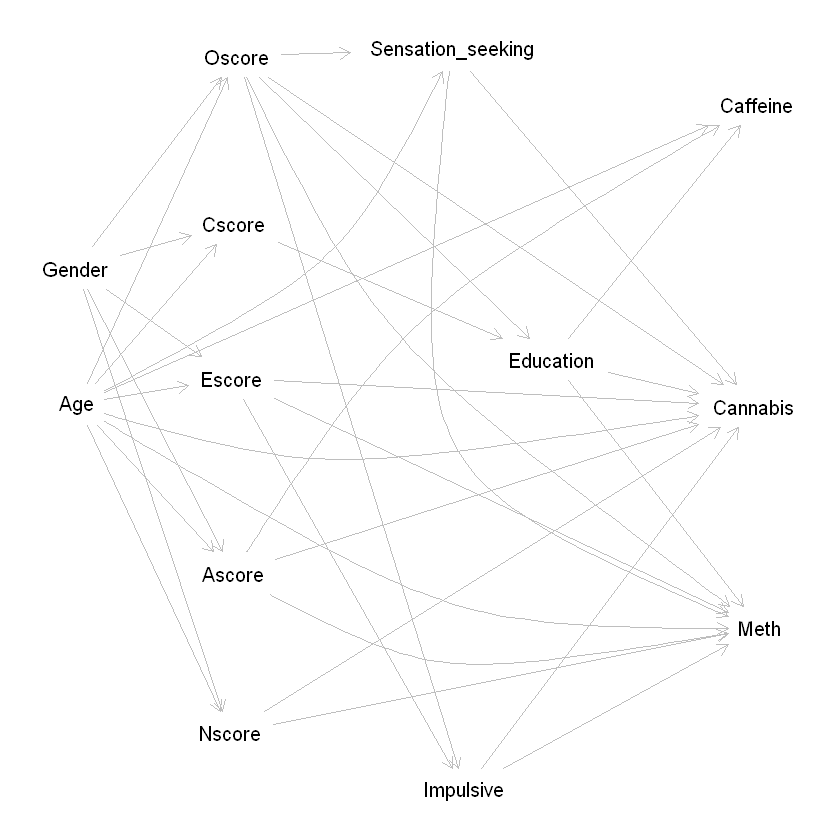

In [11]:
graph <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.140,0.493"]
Ascore [pos="0.268,0.602"]
Caffeine [pos="0.696,0.299"]
Cannabis [pos="0.694,0.494"]
Cscore [pos="0.269,0.376"]
Education [pos="0.528,0.464"]
Escore [pos="0.266,0.476"]
Gender [pos="0.139,0.405"]
Impulsive [pos="0.457,0.742"]
Meth [pos="0.698,0.637"]
Nscore [pos="0.265,0.705"]
Oscore [pos="0.271,0.268"]
Sensation_seeking [pos="0.447,0.264"]
Age -> Ascore
Age -> Caffeine
Age -> Cannabis [pos="0.332,0.543"]
Age -> Cscore
Age -> Escore
Age -> Meth [pos="0.450,0.644"]
Age -> Nscore
Age -> Oscore
Age -> Sensation_seeking [pos="0.366,0.404"]
Ascore -> Caffeine [pos="0.399,0.432"]
Ascore -> Cannabis
Ascore -> Meth [pos="0.429,0.676"]
Cscore -> Education
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Cannabis
Escore -> Impulsive
Escore -> Meth
Gender -> Ascore
Gender -> Cscore
Gender -> Escore
Gender -> Nscore
Gender -> Oscore
Impulsive -> Cannabis
Impulsive -> Meth
Nscore -> Cannabis
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education
Oscore -> Impulsive
Oscore -> Meth [pos="0.376,0.454"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.393,0.550"]
}')
plot(graph)

In [12]:
impliedConditionalIndependencies(graph)

Age _||_ Edct | Cscr, Oscr
Age _||_ Gndr
Age _||_ Impl | Escr, Oscr
Ascr _||_ Cscr | Age, Gndr
Ascr _||_ Edct | Cscr, Oscr
Ascr _||_ Edct | Age, Gndr
Ascr _||_ Escr | Age, Gndr
Ascr _||_ Impl | Escr, Oscr
Ascr _||_ Impl | Age, Gndr
Ascr _||_ Nscr | Age, Gndr
Ascr _||_ Oscr | Age, Gndr
Ascr _||_ Sns_ | Age, Oscr
Ascr _||_ Sns_ | Age, Gndr
Cffn _||_ Cnnb | Age, Ascr, Edct
Cffn _||_ Cscr | Age, Edct, Gndr
Cffn _||_ Cscr | Age, Ascr, Edct
Cffn _||_ Escr | Age, Gndr
Cffn _||_ Escr | Age, Ascr, Cscr, Oscr
Cffn _||_ Escr | Age, Ascr, Edct
Cffn _||_ Gndr | Age, Ascr, Cscr, Oscr
Cffn _||_ Gndr | Age, Ascr, Edct
Cffn _||_ Impl | Escr, Oscr
Cffn _||_ Impl | Age, Gndr, Oscr
Cffn _||_ Impl | Age, Edct, Gndr
Cffn _||_ Impl | Age, Ascr, Cscr, Oscr
Cffn _||_ Impl | Age, Ascr, Edct
Cffn _||_ Meth | Age, Ascr, Edct
Cffn _||_ Nscr | Age, Gndr
Cffn _||_ Nscr | Age, Ascr, Cscr, Oscr
Cffn _||_ Nscr | Age, Ascr, Edct
Cffn _||_ Oscr | Age, Edct, Gndr
Cffn _||_ Oscr | Age, Ascr, Edct
Cffn _||_ Sns_ | Age, Oscr

In [13]:
localTests( graph, sample.cov=M, sample.nobs=nrow(df) )

,estimate,p.value,2.5%,97.5%
"Age _||_ Edct | Cscr, Oscr",0.15406406,1.654290e-11,0.1096558246,0.197879995
Age _||_ Gndr,-0.12196667,1.051249e-07,-0.1662084680,-0.077243747
"Age _||_ Impl | Escr, Oscr",0.11330880,8.050409e-07,0.0684870077,0.157680739
"Ascr _||_ Cscr | Age, Gndr",0.21365624,5.015096e-21,0.1701353433,0.256430039
"Ascr _||_ Edct | Cscr, Oscr",0.02916819,2.058493e-01,-0.0160253605,0.074242954
"Ascr _||_ Edct | Age, Gndr",0.04397682,5.638862e-02,-0.0011979956,0.088972880
"Ascr _||_ Escr | Age, Gndr",0.15137826,3.729570e-11,0.1069380088,0.195234935
"Ascr _||_ Impl | Escr, Oscr",0.18062815,2.399434e-15,0.1365732378,0.224011336
"Ascr _||_ Impl | Age, Gndr",0.15245385,2.697959e-11,0.1080263354,0.196294274
"Ascr _||_ Nscr | Age, Gndr",-0.23313191,7.216289e-25,-0.2755125397,-0.189976666


In [14]:
df$Caffeine <- as.numeric(ordered(df$Caffeine, levels =c("0","1","2","3","4","5","6")))
df$Cannabis <- as.numeric( ordered(df$Cannabis, levels =c("0","1","2","3","4","5","6")))
df$Meth <- as.numeric( ordered(df$Meth, levels =c("0","1","2","3","4","5","6")))
df$Age <- as.numeric( ordered(df$Age, levels =c("18-24","25-34","35-44","45-54","55-64","65+")))
df$Education <- as.numeric( ordered(df$Education, levels=c("Left school before 16","Left school at 16","Left school at 17","Left school at 18","College or university dropout","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree")))

In [16]:
df$Age <- as.double(df$Age) 
df$Gender <- as.double(df$Gender) 
df$Nscore <- as.double(df$Nscore) 
df$Escore <- as.double(df$Escore) 
df$Oscore <- as.double(df$Oscore) 
df$Ascore <- as.double(df$Ascore) 
df$Cscore <- as.double(df$Cscore) 

str(df)

'data.frame':	1885 obs. of  13 variables:
 $ Age              : num  3 2 3 1 3 6 4 3 3 5 ...
 $ Gender           : num  0 1 1 0 0 0 1 1 0 1 ...
 $ Education        : num  6 9 6 8 9 4 8 2 6 8 ...
 $ Nscore           : num  39 29 31 34 43 29 31 24 42 33 ...
 $ Escore           : num  36 52 45 34 28 38 32 52 55 40 ...
 $ Oscore           : num  42 55 40 46 43 35 43 40 39 36 ...
 $ Ascore           : num  37 48 32 47 41 55 41 41 48 47 ...
 $ Cscore           : num  42 41 34 46 50 52 48 52 49 43 ...
 $ Impulsive        : num  0.188 0.163 0.146 0.146 0.188 ...
 $ Sensation_seeking: num  0.07 0.118 0.132 0.07 0.118 ...
 $ Caffeine         : num  7 7 7 6 7 7 7 7 7 7 ...
 $ Cannabis         : num  1 5 4 3 4 1 2 1 1 2 ...
 $ Meth             : num  1 4 1 1 1 1 1 1 1 1 ...


In [53]:
# For loops are overrated (leave me alone R is weird okay)

print("age")
unique(df$Age)
print("gender")
unique(df$Gender)
print("education")
unique(df$Education)
print("Nscore")
unique(df$Nscore)
print("Escore")
unique(df$Escore)
print("Cscore")
unique(df$Cscore)
print("Impulsive")
unique(df$Impulsive)
print("Sensation_seeking")
unique(df$Sensation_seeking)
print("Caffeine")
unique(df$Caffeine)
print("Cannabis")
unique(df$Cannabis)
print("Meth")
unique(df$Meth)

[1] "age"


[1] 3 2 1 6 4 5

[1] "gender"


[1] 0 1

[1] "education"


[1] 6 9 8 4 2 7 5 1 3

[1] "Nscore"


[1] 39 29 31 34 43 24 42 33 26 56 28 27 19 22 41 49 32 25 40 51 35 36 46 44 37
[26] 47 23 30 38 18 45 17 53 50 60 21 54 59 48 20 55 16 57 52 58 14 15 13 12

[1] "Escore"


[1] 36 52 45 34 28 38 32 55 40 41 49 29 31 39 27 43 33 16 44 37 51 42 48 46 47
[26] 35 50 30 26 58 53 54 23 22 24 19 20 21 25 56 59 18

[1] "Cscore"


[1] 42 41 34 46 50 52 48 49 43 53 38 36 59 47 31 30 33 35 51 25 37 45 39 44 27
[26] 40 29 54 55 32 56 20 28 26 22 24 23 19 17 21 57

[1] "Impulsive"


[1] 0.1883 0.1629 0.1464 0.1363 0.1146 0.0785 0.0552 0.0106 0.1034 0.0037

[1] "Sensation_seeking"


[1] 0.0700 0.1183 0.1321 0.0462 0.1162 0.1119 0.0897 0.1114 0.0377 0.0546

[1] "Caffeine"


[1] 7 6 5 4 1 2 3

[1] "Cannabis"


[1] 1 5 4 3 2 7 6

[1] "Meth"


[1] 1 4 2 7 5 3 6

In [17]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(df))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(df)), size = smp_size)

train <- df[train_ind, ]
test <- df[-train_ind, ]

In [18]:
str(train)
str(test)

'data.frame':	1413 obs. of  13 variables:
 $ Age              : num  1 1 4 5 2 1 1 4 1 4 ...
 $ Gender           : num  1 0 0 1 0 1 1 1 1 0 ...
 $ Education        : num  4 7 7 4 7 5 5 7 6 7 ...
 $ Nscore           : num  30 39 44 20 27 40 30 38 42 49 ...
 $ Escore           : num  32 34 33 43 48 37 43 32 26 35 ...
 $ Oscore           : num  42 53 43 38 46 53 58 41 48 48 ...
 $ Ascore           : num  29 48 48 43 43 33 51 41 44 52 ...
 $ Cscore           : num  56 48 41 45 45 41 45 37 38 43 ...
 $ Impulsive        : num  0.188 0.136 0.136 0.163 0.163 ...
 $ Sensation_seeking: num  0.112 0.118 0.118 0.112 0.07 ...
 $ Caffeine         : num  7 6 7 7 5 4 7 7 7 7 ...
 $ Cannabis         : num  7 4 2 1 3 5 6 2 6 1 ...
 $ Meth             : num  1 4 1 1 1 1 3 1 1 1 ...
'data.frame':	472 obs. of  13 variables:
 $ Age              : num  3 4 5 4 6 5 6 3 4 2 ...
 $ Gender           : num  1 1 0 1 1 0 1 1 0 0 ...
 $ Education        : num  6 8 6 6 1 4 1 8 5 8 ...
 $ Nscore           : num  31 31

In [19]:
network <- model2network(toString(graph,"bnlearn"))
fit <- bn.fit(network, as.data.frame(scale(train)))
fit


  Bayesian network parameters

  Parameters of node Age (Gaussian distribution)

Conditional density: Age
Coefficients:
 (Intercept)  
4.400035e-18  
Standard deviation of the residuals: 1 

  Parameters of node Ascore (Gaussian distribution)

Conditional density: Ascore | Age + Gender
Coefficients:
  (Intercept)            Age         Gender  
 2.412982e-16   4.609665e-02  -2.188232e-01  
Standard deviation of the residuals: 0.9744353 

  Parameters of node Caffeine (Gaussian distribution)

Conditional density: Caffeine | Age + Ascore + Education
Coefficients:
  (Intercept)            Age         Ascore      Education  
 3.845668e-16   2.415311e-02  -1.345350e-02   4.679475e-02  
Standard deviation of the residuals: 0.9995335 

  Parameters of node Cannabis (Gaussian distribution)

Conditional density: Cannabis | Age + Ascore + Education + Escore + Impulsive + Nscore + Oscore + Sensation_seeking
Coefficients:
      (Intercept)                Age             Ascore          Education 

In [24]:
# df$Age <- as.double(df$Age) 
predict(fit,node="Cannabis", data=test,method="bayes-lw")

[1]  2.13882887  2.95258848  3.67666527  3.60302677  1.15218977 -3.00267192
  [7] -2.19315891  0.51304588 -0.53146426 -1.12985227 -1.33129925 -0.87646725
 [13]  5.29450116  5.69859236 -0.11749587  6.98031980  2.85583339  3.40438515
 [19]  4.87331794  4.11907398  4.76869590 -1.42045778  2.48731169  0.29630521
 [25]  3.13634070  6.97247267  1.61433378  1.20190961  1.96986311  3.07261287
 [31]  2.06436953  2.48359669 -0.89254896  3.02690329  1.49813216 -1.47145546
 [37]  3.56943196  1.33770183 -0.59225817  2.40723026  2.37749016 -1.85316202
 [43]  2.79666994  1.17998602  4.51483224 -1.30194672 -0.28852719  0.78028402
 [49]  0.94673116  3.73702397  2.65793017  2.47836998  5.84768630  2.06096603
 [55]  2.50282251  4.13045367  2.25768391  1.63264863 -0.07377090  0.61951860
 [61]  2.72749293  3.51641317  1.07336357 -0.13133464  2.40397942  0.08538955
 [67]  2.37754688  2.76547908  6.76233234  0.72341021  4.58967893 -1.52358162
 [73]  0.21826281  0.50806074  2.92946127  2.44072157  3.63596830  2.41023318
 [79]  2.73866428  1.57511891 -0.32213618 -0.57279205  1.80719654  0.80734164
 [85]  1.82273998  2.88298792  4.37856187  1.39382407  2.50188720  1.72070602
 [91]  3.38046483  3.24655130  4.53797046  1.58268999  0.01047380  2.76101177
 [97]  5.17153246  5.81523847 -0.53452858  4.03970273  3.24524913  2.24568021
[103]  4.83677831  3.01166326  4.48266124 -0.29662660  1.33595766  7.29782422
[109]  5.82221838  4.16829031  2.34397984  1.80728883  4.59462116  1.07081713
[115] -1.89943389  2.29180694  4.06932636  3.65685851  6.47719024  3.55148219
[121]  5.89798817  1.27167595  5.62749805 -0.95297174  7.91145784  3.48861761
[127]  5.57543153  4.22817145  8.00177483  0.43848143  2.15841728  1.71530803
[133]  1.82445599  5.01291330  2.92531860  0.23418805  4.35945318  1.27189047
[139]  1.86842919  3.95062347  5.45161727  2.35668109  0.61886906  4.35694948
[145]  3.10273917  4.98627424  4.13934631  4.31422587 -2.36663323  2.95824397
[151]  2.73412228  0.89418964  1.83958355 -1.87005796  0.79540652  1.24234488
[157]  6.27482744  7.76668605  4.07745866  3.80190417  2.77232270  3.15563105
[163]  4.69538589  3.15981930  4.11430417 -1.71459963  3.30578361  2.67884429
[169]  1.94230183  3.60981678  0.96313204  2.89047442  3.44955809  2.77752411
[175]  3.70489014  5.54813794  2.86963769  4.98231337  2.42347816  2.61220998
[181]  3.68926482  4.89534555  5.87620838  2.70034654  2.01554885  6.48076162
[187]  6.87664012  4.70595491  7.50547680  5.89204461 -0.16928120  0.52497215
[193]  6.04386127  3.46137553  7.49218559  7.12840546  2.42918170  5.38716925
[199]  6.80490212  4.86889302  4.16885549  5.15652534  4.29495841  3.19360351
[205]  5.43631158  5.67863185  7.97416553  4.66656117  5.28711790  4.18486941
[211] -2.74340474  4.52983884  6.87145164  4.27531477  2.94059096  4.96003811
[217]  4.07108752  0.23256826  7.43028876  6.27923124  8.03039549  5.90888941
[223]  5.22241493  7.87018716  4.86400681  7.11111406  4.58938185  5.60609879
[229]  8.23022449  5.35334129  2.75188112  4.37679329  4.22414890  7.91384786
[235]  4.87799010  6.78262547  4.34936567  4.99445473  5.91681831  3.50438135
[241]  2.83772225  4.91742303  8.15881395  3.75085409  4.29805307  5.55044477
[247]  4.98236047  7.32455554  7.77409909  7.28576707 -2.16166342  0.68072314
[253]  2.84152774  1.89492473  2.37911321  3.29136768  7.14966389  4.39334627
[259]  3.18308343  6.60756147  0.89656237  4.23405319  5.36840011  7.47216104
[265]  5.45769529  1.81998339  0.39074851  3.53736381  5.85901705  3.09447496
[271]  4.70587931  4.62516870  3.47588559  3.37832441  6.46805147  7.64752097
[277]  0.26709041 -0.09865468  1.19016238  2.87382451  4.18754048  8.11622382
[283]  0.79407824  2.01992982  3.74454575  7.02529019 10.12616134  2.75457145
[289]  4.49390703  6.72271768  2.21177812  1.79361709  3.95689593  6.27936736
[295]  3.47731697  7.87212126  8.11262394  4.46001609  2.14897734  2.25410139
[301]  6.22028726  4.84960109  6.02065725  4.47732391  5.03306066  2.06337856
[307]  4.22099512  7.573